# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn
from torch.nn import functional as F

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

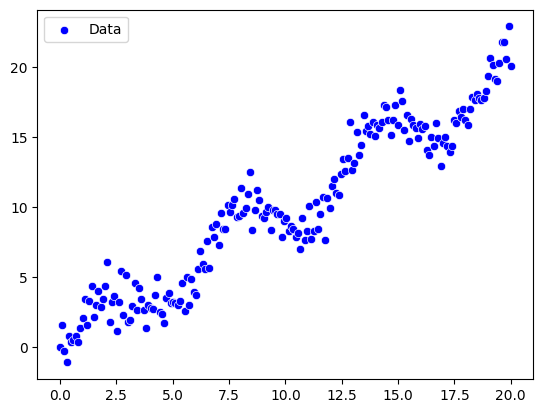

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [52]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [53]:
df = Simple1DRegressionDataset(X,y)


In [54]:
df[0]


(tensor([0.]), tensor([-0.0061]))

In [374]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True,batch_size=200)

In [402]:
class mod(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, out_features)
        )
    def forward(self,x):
        x = self.seq(x)
        return x

In [403]:
# construct the model using Linear block
in_features = 1
out_features = 1
model_2 = mod(in_features,out_features)


In [404]:
loss_fn = nn.MSELoss()

In [405]:
opt = torch.optim.Adam(params=model_2.parameters(),lr=0.001)

In [406]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=10,
                        device='cpu',
                        optimizer=None
                        ):

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0
        for inputs , labels in training_loader:

            optimizer.zero_grad()

            inputs = inputs.to(device)
            labels = labels.to(device)


            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
        print(running_loss)



In [407]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [408]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=500,
                optimizer= opt
                )


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

146.94766235351562
142.44229125976562
140.0548858642578
138.64486694335938
137.25473022460938
135.9102020263672
134.580810546875
133.25640869140625
132.116455078125
131.16815185546875
130.12225341796875
129.02146911621094
127.99291229248047
127.13285064697266
126.5314712524414
125.83402252197266
125.26779174804688
124.7392807006836
124.24474334716797
123.77828979492188
123.3057632446289
122.84598541259766
122.39396667480469
121.9563980102539
121.5351333618164
121.13468933105469
120.74124145507812
120.33116149902344
119.94056701660156
119.55956268310547
119.17459869384766
118.76547241210938
118.36116027832031
117.98089599609375
117.60564422607422
117.21517944335938
116.83271789550781
116.42561340332031
116.02476501464844
115.64006805419922
115.24186706542969
114.85383605957031
114.47045135498047
114.09326934814453
113.73246765136719
113.36836242675781
113.00801086425781
112.64251708984375
112.29170989990234
111.93641662597656
111.57666015625
111.23770141601562
110.90039825439453
110.551

In [409]:
# lets try our model
model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).numpy()

<Axes: >

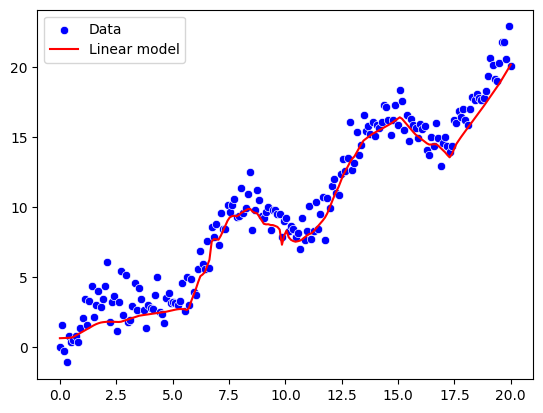

In [410]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
